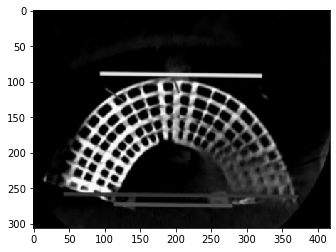

In [2]:
from skimage.measure import find_contours
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

orig_img = imread('templates/test3.png')[:,:,:3]
gray_img = rgb2gray(orig_img)
plt.imshow(gray_img,interpolation='nearest', cmap=plt.cm.gray)
# plt.imshow(orig_img,interpolation='nearest')

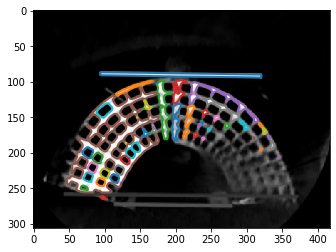

In [3]:
contours = find_contours(gray_img, 0.6)

fig, ax = plt.subplots()
ax.imshow(gray_img, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contours[n][:, 1], contours[n][:, 0], linewidth=2)

plt.show()

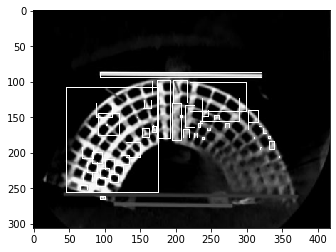

In [4]:
from skimage.draw import polygon, polygon_perimeter
import numpy as np

bounding_boxes = []

for contour in contours:
    Xmin = np.min(contour[:,0])
    Xmax = np.max(contour[:,0])
    Ymin = np.min(contour[:,1])
    Ymax = np.max(contour[:,1])
    
    bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])
    

with_boxes  = np.copy(gray_img)

for box in bounding_boxes:
    # box = bounding_boxes[0]
        #[Xmin, Xmax, Ymin, Ymax]
    r = [box[0],box[1],box[1],box[0], box[0]]
    c = [box[3],box[3],box[2],box[2], box[3]]
    rr, cc = polygon_perimeter(r, c, with_boxes.shape)
    # print(r)
    # print(c)
    with_boxes[rr, cc] = 1 #set color white

plt.imshow(with_boxes, interpolation='nearest', cmap=plt.cm.gray)
plt.show()

[86.58032200923999, 94.15349552169232, 93.77904850459753, 320.6006645056892]


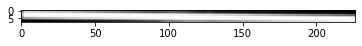

In [5]:
box = bounding_boxes[0]
print(box)
imgRect = gray_img[int(box[0]):int(box[1]), int(box[2]):int(box[3])]
plt.imshow(imgRect, interpolation='nearest', cmap=plt.cm.gray)

In [6]:
from deskew import determine_skew

angle = determine_skew(imgRect)
print(angle)

None


c:\Users\ybenr\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\ybenr\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
from skimage.transform import rotate

rotated = rotate(imgRect, angle, resize=True) * 255
plt.imshow(rotated.astype(np.uint8), interpolation='nearest', cmap=plt.cm.gray)

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable deg2rad method